In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
import random

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [29]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

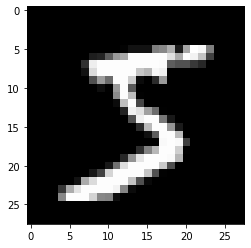

In [30]:
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')
plt.show()

In [31]:
%%time
#Create a Decision Tree classifier with default value
dtree = DecisionTreeClassifier()


CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 26.5 µs


In [32]:
%%time
dtree.fit(x_train,y_train)

CPU times: user 23 s, sys: 76 ms, total: 23.1 s
Wall time: 23 s


DecisionTreeClassifier()

In [33]:
%%time
dtree_predictions = dtree.predict(x_test)

CPU times: user 22 ms, sys: 1 µs, total: 22 ms
Wall time: 20.9 ms


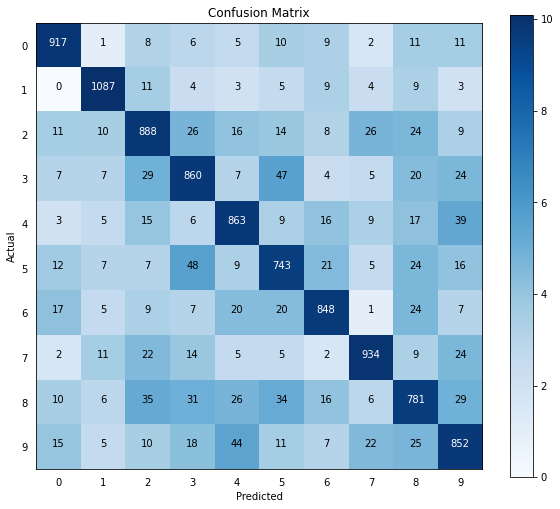

In [34]:
con_matrix = confusion_matrix(y_test,dtree_predictions)

f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(con_matrix+1),cmap="Blues")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = con_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(con_matrix[i,j]),horizontalalignment="center",color="white" if con_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix2.png")
plt.show()

In [35]:
score=accuracy_score(y_test,dtree_predictions)
print("Decision Tree classifier With Default Values Accuracy Score: {0}".format(score))

Decision Tree classifier With Default Values Accuracy Score: 0.8773


In [36]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


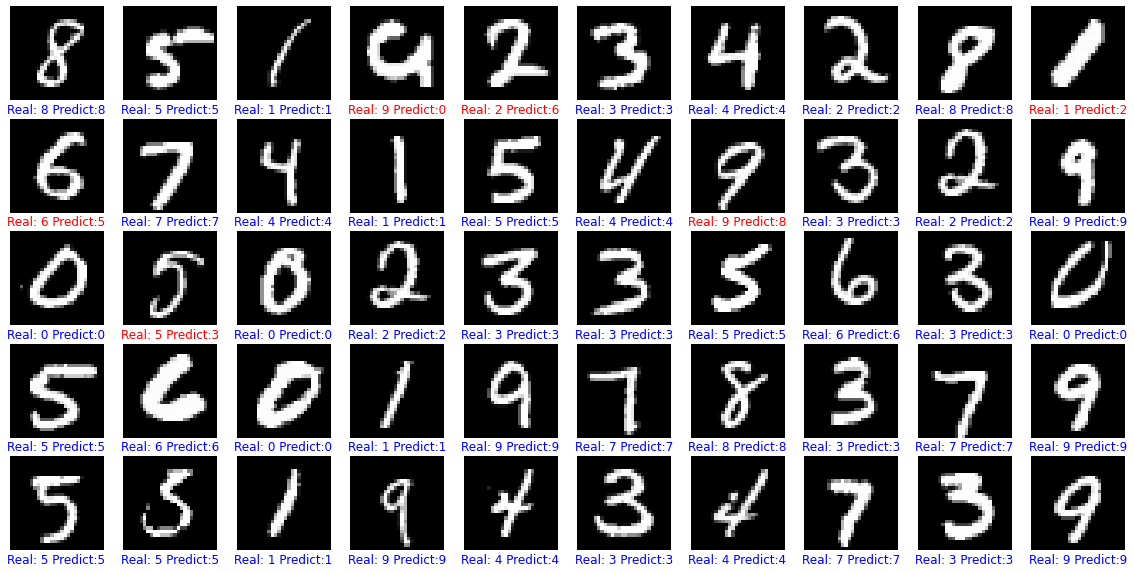

In [51]:
rows = 5
cols = 10
sub_plot = 1
f = plt.figure(figsize=(2*cols,2*rows))
for i in range(50):
      index = random.randint(0,10000)
      f.add_subplot(rows,cols,sub_plot) 
      sub_plot+=1
      plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
      plt.axis("off")
      if dtree_predictions[index] == y_test[index]:
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(dtree_predictions[index])), y=-0.20,color="Blue")
      else: 
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(dtree_predictions[index])), y=-0.20,color="Red")
plt.savefig("predictions.png")
plt.show()

In [38]:
%%time
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dclf = GridSearchCV(dtree, tree_param, cv=10)

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 44.8 µs


In [39]:
%%time
dclf.fit(x_train,y_train)

CPU times: user 1h 26min 48s, sys: 4.4 s, total: 1h 26min 53s
Wall time: 1h 26min 29s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [40]:

dclf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=70)

In [41]:
%%time
dclf_predictions = dclf.predict(x_test)

CPU times: user 16 ms, sys: 1 ms, total: 17 ms
Wall time: 18.1 ms


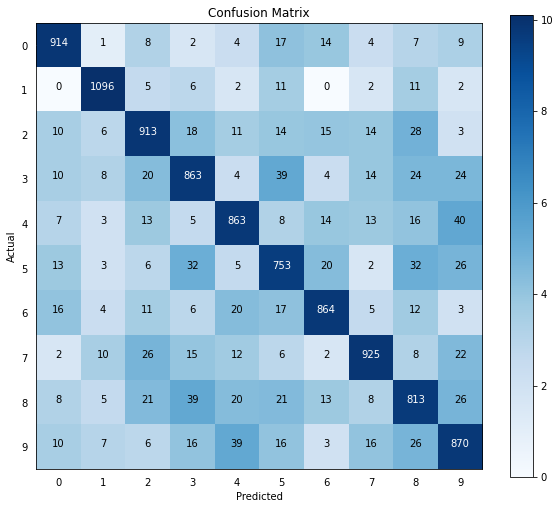

In [42]:
con_matrix = confusion_matrix(y_test,dclf_predictions)

f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(con_matrix+1),cmap="Blues")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = con_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(con_matrix[i,j]),horizontalalignment="center",color="white" if con_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix2.png")
plt.show()

In [57]:
dclf_score=accuracy_score(y_test,dclf_predictions)
print("Decision Tree classifier With max depth = 70, using entropy Accuracy Score: {0}".format(dclf_score))

Decision Tree classifier With max depth = 70, using entropy Accuracy Score: 0.8874


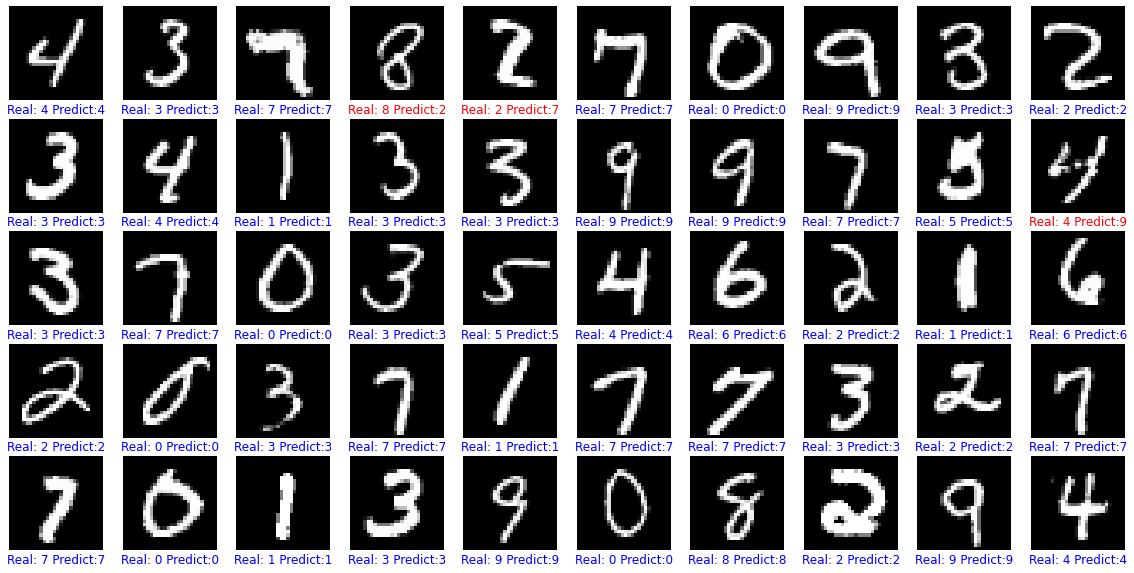

In [47]:
rows = 5
cols = 10
sub_plot = 1
f = plt.figure(figsize=(2*cols,2*rows))
for i in range(50):
      index = random.randint(0,10000)
      f.add_subplot(rows,cols,sub_plot) 
      sub_plot+=1
      plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
      plt.axis("off")
      if dclf_predictions[index] == y_test[index]:
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(dclf_predictions[index])), y=-0.20,color="Blue")
      else: 
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(dclf_predictions[index])), y=-0.20,color="Red")
plt.savefig("predictionsBestEstimator.png")
plt.show()